# A Helpful Class to Interface With the Patient Data
Based off of Pandas Dataframes

In [1]:
from Patient import Patient
from Database import Database

## Database Interface:
Database Methods deal with database-wide searches, meaning they are functions that are not specific for a single patient.
# Initialize Database

In [ ]:
d = Database()

### 1. fetch_mrns()
Return a list of all the mrns found in the database


In [ ]:
d.fetch_mrns()

### 2. search_name
MRN Lookup by Name.  Case-insensitive


In [ ]:
d.search_name()

In [ ]:
#Can specify last name 
d.search_name(last_name = "Funk1")

In [ ]:
#Specify First Name 
d.search_name(first_name = "Smith1")

In [ ]:
#Or Both
d.search_name(first_name = "john", last_name = "doe")

### 3. search()
Lookup by tag.  Returns all data that matches a given tag.  CASE-SENSITIVE

In [ ]:
d.search("diagnosis")

In [ ]:
d.search("dob")

## Patient Interface
A simplistic way to retrieve the data for each patient

In [2]:
p = Patient()

Connect To Database


username: ········
encryption key: ········


Connected: {'user': 'admin', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,rad_onc,public', 'sslmode': 'require', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [3]:
mrn = 666666
p.load_mrn(mrn)
#lists all the attributes related to the patient with mrn 333333
p.attributes

['c61.M',
 'c61.N',
 'c61.T',
 'c61.biochemical_progression',
 'c61.gleason_grade_group',
 'c61.psa',
 'c61.radiation',
 'c61.surgery',
 'c61.surgical_margin',
 'c61.target_progression',
 'c61.tmp',
 'c61.toxicity',
 'diagnosis',
 'dob',
 'document_type',
 'first_name',
 'last_name',
 'mrn']

In [4]:
mrn = 222222
p.load_mrn(mrn)
#lists all the attributes related to the patient with mrn 333333
p.attributes

['diagnosis', 'dob', 'document_type', 'first_name', 'last_name', 'mrn']

In [5]:
#prints out all data relating to this patient
p

MRN: 222222

diagnosis:
C61;Malignant_neoplasm_of_prostate

dob:
1952-12-17

document_type:
         date     value
0  2022-12-06  progress

first_name:
Smith2

last_name:
John2

mrn:
222222


## Pandas-like Indexing

In [6]:
#Two ways to index. This is the first way.
p.last_name

'John2'

In [7]:
#Second way to index
p["c61.psa"]

,psa,date,unit
0,0.063,2022-12-22,ng/mL
1,4.6,2018-02-01,ng/mL
2,0.2,2022-03-26,ng/mL


In [8]:
#multi index.
fname, lname, dob = p["first_name", "last_name", "dob"]
print(fname)
print(lname)
print(dob)

Smith2
John2
1952-12-17


## Example Use Case: PSA time series

In [12]:
p["c61.psa"]

,psa,date,unit
0,0.063,2022-12-22,ng/mL
1,4.6,2018-02-01,ng/mL
2,0.2,2022-03-26,ng/mL


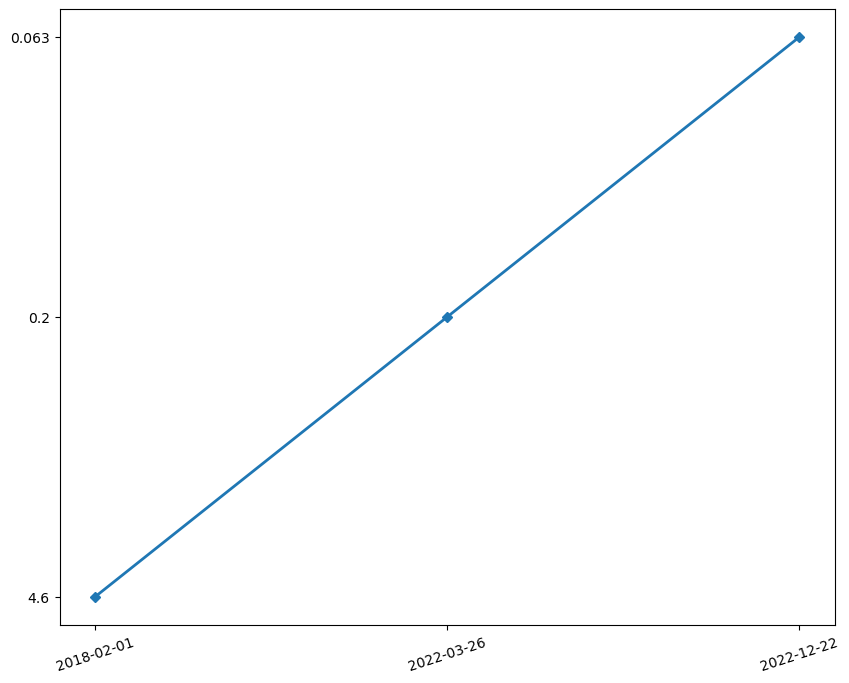

In [13]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
ax.tick_params(axis='x', labelrotation = 18)

df = p["c61.psa"]
df= df.sort_values(by = "date")
ax.plot(df["date"], df["psa"], marker = "D", linewidth = 2, markersize = 5)


## One Last Method(For Debugging)

In [14]:
help(p.rawdata)
p.rawdata("c61.psa")

Help on method rawdata in module Patient:

rawdata(attribute) method of Patient.Patient instance
    Input: attribute -> Output: data for that attribute in a list of dictionaries. 
    The data returned is exactly how it is stored in the SQL database.
    For example: [{'date': '2023-01-04', 'color': 'blue'}, {'date': '2023-01-12', 'color': 'green'}]
    The rationale for the existence of this method is twofold.
    1. There is a bug in setting an attribute due to a weird data entry or something else.
    2. It is hard to access a single cell of data in a DataFrame.  A dictionary is a lot easier.



[]